<a href="https://colab.research.google.com/github/rithikkulkarni/data-science/blob/main/(Version_2)_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook modifies several aspects of our previous merging/cleaning/wrangling process which include, but are not limited to:
- More systematic approach for dealing with duplicate ids
- Keeping some variables we previously deleted (e.g., imdb_score, tmdb_score)
- Creating new variables such as genres_count and production_countries_count
- Updating genres to be a full list of unique genres (as opposed to one)
- Adding (experimental) variables genres_uniqueness and production_countries_uniqueness to quantify how unique a genres or production_countries value is.

Currently in the works:
- Performing EDA separately using these variables.

In [1]:
# Import pandas
import pandas as pd

# Read in the file and print out the DataFrame

hulu_data = pd.read_csv("https://raw.githubusercontent.com/cacress/CSC442/refs/heads/main/datasets/titles_hulu.csv")
netflix_data = pd.read_csv("https://raw.githubusercontent.com/cacress/CSC442/refs/heads/main/datasets/titles_netflix.csv")

In [2]:
hulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2398 non-null   object 
 1   title                 2398 non-null   object 
 2   type                  2398 non-null   object 
 3   description           2385 non-null   object 
 4   release_year          2398 non-null   int64  
 5   age_certification     1713 non-null   object 
 6   runtime               2398 non-null   int64  
 7   genres                2398 non-null   object 
 8   production_countries  2398 non-null   object 
 9   seasons               1330 non-null   float64
 10  imdb_id               2263 non-null   object 
 11  imdb_score            2232 non-null   float64
 12  imdb_votes            2231 non-null   float64
 13  tmdb_popularity       2348 non-null   float64
 14  tmdb_score            2238 non-null   float64
dtypes: float64(5), int64(

In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [4]:
# First, we filter out the observations from the Hulu and Netflix datasets if the
# observations is without a title, is without a imdb_score and tmdb_score, or
# is without tmdb_popularity
netflix_data.dropna(subset=['title', 'tmdb_popularity'], inplace=True)
netflix_data = netflix_data[netflix_data['imdb_score'].notnull() | netflix_data['tmdb_score'].notnull()]

hulu_data.dropna(subset=['title', 'tmdb_popularity'], inplace=True)
hulu_data = hulu_data[hulu_data['imdb_score'].notnull() | hulu_data['tmdb_score'].notnull()]

# Remove observations from both datasets that have '[]' value for genres or production_countries
netflix_data = netflix_data[netflix_data['genres'] != "[]"]
netflix_data = netflix_data[netflix_data['production_countries'] != "[]"]

hulu_data = hulu_data[hulu_data['genres'] != "[]"]
hulu_data = hulu_data[hulu_data['production_countries'] != "[]"]

# This removes about 125 and 350 observations from the Hulu and Netflix datasets, respectively

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5501 entries, 1 to 5847
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5501 non-null   object 
 1   title                 5501 non-null   object 
 2   type                  5501 non-null   object 
 3   description           5495 non-null   object 
 4   release_year          5501 non-null   int64  
 5   age_certification     3101 non-null   object 
 6   runtime               5501 non-null   int64  
 7   genres                5501 non-null   object 
 8   production_countries  5501 non-null   object 
 9   seasons               1988 non-null   float64
 10  imdb_id               5194 non-null   object 
 11  imdb_score            5157 non-null   float64
 12  imdb_votes            5143 non-null   float64
 13  tmdb_popularity       5501 non-null   float64
 14  tmdb_score            5375 non-null   float64
dtypes: float64(5), int64(2), o

In [6]:
hulu_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, 0 to 2396
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2273 non-null   object 
 1   title                 2273 non-null   object 
 2   type                  2273 non-null   object 
 3   description           2272 non-null   object 
 4   release_year          2273 non-null   int64  
 5   age_certification     1663 non-null   object 
 6   runtime               2273 non-null   int64  
 7   genres                2273 non-null   object 
 8   production_countries  2273 non-null   object 
 9   seasons               1243 non-null   float64
 10  imdb_id               2173 non-null   object 
 11  imdb_score            2162 non-null   float64
 12  imdb_votes            2161 non-null   float64
 13  tmdb_popularity       2273 non-null   float64
 14  tmdb_score            2194 non-null   float64
dtypes: float64(5), int64(2), o

In [7]:
# Concatentate datasets, we plan to merge first than focus on cleaning/wrangling
combined_df = pd.concat([hulu_data, netflix_data])
combined_df.shape

(7774, 15)

In [8]:
# Suggested option according to pandas documentation
pd.options.mode.copy_on_write = True

# Check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
num_duplicates = combined_df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Check if there are duplicate IDs
duplicates_exist = combined_df['id'].duplicated().any()
print("\nAre there duplicate IDs?:", duplicates_exist)

# Extract the duplicate rows and store in separate dataframe
duplicate_rows_df = combined_df[combined_df['id'].duplicated(keep=False)]
duplicate_rows_df.sort_values(by='id', inplace=True, ignore_index=True)
# Remove the duplicate rows from the original merged dataset
combined_df.drop_duplicates(subset=['id'], keep=False, inplace=True)

print(duplicate_rows_df.shape)
print(combined_df.shape)
duplicate_rows_df.head()

# We have 172 observations in duplicate_rows_df, meaning with have 86 movies/shows
# that have appeared in both the Hulu and Netflix datasets

Number of duplicate rows: 0

Are there duplicate IDs?: True
(172, 15)
(7602, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['animation', 'comedy', 'family', 'action', 'f...",['US'],NaN,tt0243585,5.5,54193.0,36.691,5.733
1,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['comedy', 'fantasy', 'animation', 'family']",['US'],NaN,tt0243585,5.5,53746.0,32.090,5.700
2,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,135,"['drama', 'comedy', 'romance']","['GB', 'US']",NaN,tt0314331,7.6,476101.0,36.484,7.100
3,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,"['drama', 'comedy', 'romance']","['US', 'GB']",NaN,tt0314331,7.6,474176.0,21.297,7.100
4,tm140391,Pan,MOVIE,Living a bleak existence at a London orphanage...,2015,PG,111,"['action', 'fantasy', 'family', 'comedy']","['US', 'GB']",NaN,tt3332064,5.7,63788.0,24.494,6.000


In [9]:
# To deal with observations with duplicate ids, will edit the first instance of each movie/show
# such that we can add this instance back to the original concatenated dataset while deleting
# the second instance.

# Here is the procedure (assuming all other non-mentioned variables are kept consistent across instances):
# 1) Use the value for runtime that is higher among the two observations -- keep the same if both are equal
# 2) For genres, convert it to a list that stores the unique genres from both instances
# 3) If the first instance has higher imdb_votes, use its values for imdb_score, imdb_votes, tmdb_popularity, and tmdb_score
#       else if the second instance has higher imdb_votes, use its values for the same variables
#       else if both have the same imdb_votes, then use the values for imdb_score, imdb_votes, tmdb_popularity, and tmdb_score that are highest, if not equal

In [10]:
# Example below of two instances of the same movie
obs_1 = duplicate_rows_df.iloc[1]
obs_2 = duplicate_rows_df.iloc[0]
# We will edit obs_1 based on the procedure described in the previous comment block

''' Dealing with different runtimes '''
if (obs_1['runtime'] < obs_2['runtime']):
    obs_1['runtime'] = obs_2['runtime']

''' Dealing with different genres '''
# Convert the values in the genres variable to lists
import ast
genre_list_1 = ast.literal_eval(obs_1['genres'])
genre_list_2 = ast.literal_eval(obs_2['genres'])

print('BEFORE\nobs_1 genres:', genre_list_1)
print('obs_2 genres:', genre_list_2)

# Iterate through genre_list_2 and check if each element is in genre_list_1. If not, add it to genre_list_1
for genre in genre_list_2:
    if genre not in genre_list_1:
        genre_list_1.append(genre)

# Both genre_list_1 and genre_list_2 should have the same elements, possibly in different orders
print('AFTER\nobs_1 genres:', genre_list_1)
print('obs_2 genres:', genre_list_2)

# Convert the list back to a string
obs_1['genres'] = str(genre_list_1)

''' Dealing with different imdb_votes '''
if (obs_1['imdb_votes'] < obs_2['imdb_votes']):
    obs_1['imdb_score'] = obs_2['imdb_score']
    obs_1['imdb_votes'] = obs_2['imdb_votes']
    obs_1['tmdb_popularity'] = obs_2['tmdb_popularity']
    obs_1['tmdb_score'] = obs_2['tmdb_score']
else:
    obs_1['imdb_votes'] = max(obs_1['imdb_votes'], obs_2['imdb_votes'])
    obs_1['imdb_score'] = max(obs_1['imdb_score'], obs_2['imdb_score'])
    obs_1['tmdb_popularity'] = max(obs_1['tmdb_popularity'], obs_2['tmdb_popularity'])
    obs_1['tmdb_score'] = max(obs_1['tmdb_score'], obs_2['tmdb_score'])

# obs_1 now has updated values for runtime, genres, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score
print(obs_1)

BEFORE
obs_1 genres: ['comedy', 'fantasy', 'animation', 'family']
obs_2 genres: ['animation', 'comedy', 'family', 'action', 'fantasy']
AFTER
obs_1 genres: ['comedy', 'fantasy', 'animation', 'family', 'action']
obs_2 genres: ['animation', 'comedy', 'family', 'action', 'fantasy']
id                                                               tm114476
title                                                     Stuart Little 2
type                                                                MOVIE
description             Stuart, an adorable white mouse, still lives h...
release_year                                                         2002
age_certification                                                       G
runtime                                                                78
genres                  ['comedy', 'fantasy', 'animation', 'family', '...
production_countries                                               ['US']
seasons                                                

In [11]:
import ast

# Now do the same for the rest of duplicate_rows_df
for i in range(1, len(duplicate_rows_df), 2):
    obs_2 = duplicate_rows_df.iloc[i]
    obs_1 = duplicate_rows_df.iloc[i-1]

    ''' Dealing with different runtimes '''
    if (obs_1['runtime'] < obs_2['runtime']):
      obs_1['runtime'] = obs_2['runtime']

    ''' Dealing with different genres '''
    # Convert the values in the genres variable to lists
    genre_list_1 = ast.literal_eval(obs_1['genres'])
    genre_list_2 = ast.literal_eval(obs_2['genres'])

    # Iterate through genre_list_2 and check if each element is in genre_list_1. If not, add it to genre_list_1
    for genre in genre_list_2:
      if genre not in genre_list_1:
        genre_list_1.append(genre)

    # Convert the list back to a string
    obs_1['genres'] = str(genre_list_1)

    ''' Dealing with different imdb_votes '''
    if (obs_1['imdb_votes'] < obs_2['imdb_votes']):
      obs_1['imdb_score'] = obs_2['imdb_score']
      obs_1['imdb_votes'] = obs_2['imdb_votes']
      obs_1['tmdb_popularity'] = obs_2['tmdb_popularity']
      obs_1['tmdb_score'] = obs_2['tmdb_score']
    else:
      obs_1['imdb_votes'] = max(obs_1['imdb_votes'], obs_2['imdb_votes'])
      obs_1['imdb_score'] = max(obs_1['imdb_score'], obs_2['imdb_score'])
      obs_1['tmdb_popularity'] = max(obs_1['tmdb_popularity'], obs_2['tmdb_popularity'])
      obs_1['tmdb_score'] = max(obs_1['tmdb_score'], obs_2['tmdb_score'])

    duplicate_rows_df.iloc[i-1] = obs_1

duplicate_rows_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['animation', 'comedy', 'family', 'action', 'f...",['US'],NaN,tt0243585,5.5,54193.0,36.691,5.733
1,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['comedy', 'fantasy', 'animation', 'family']",['US'],NaN,tt0243585,5.5,53746.0,32.090,5.700
2,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,"['drama', 'comedy', 'romance']","['GB', 'US']",NaN,tt0314331,7.6,476101.0,36.484,7.100
3,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,"['drama', 'comedy', 'romance']","['US', 'GB']",NaN,tt0314331,7.6,474176.0,21.297,7.100
4,tm140391,Pan,MOVIE,Living a bleak existence at a London orphanage...,2015,PG,111,"['action', 'fantasy', 'family', 'comedy']","['US', 'GB']",NaN,tt3332064,5.7,63788.0,24.494,6.000


In [12]:
# Now we can remove the second instance of each movie/show then add the remaining observations back the combined_df
for i in range(1, len(duplicate_rows_df), 2):
  duplicate_rows_df.drop(i, inplace=True)

# Reset the indexes of the rows.
duplicate_rows_df.reset_index(drop=True, inplace=True)

# Check for duplicate ids in duplicate_rows_df
duplicates_exist = duplicate_rows_df['id'].duplicated().any()
print("\nAre there duplicate IDs?:", duplicates_exist)

# Concatenate combined_df and duplicate_rows_df
combined_df = pd.concat([combined_df, duplicate_rows_df], ignore_index=True)
combined_df.shape



Are there duplicate IDs?: False


(7688, 15)

In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7688 non-null   object 
 1   title                 7688 non-null   object 
 2   type                  7688 non-null   object 
 3   description           7681 non-null   object 
 4   release_year          7688 non-null   int64  
 5   age_certification     4685 non-null   object 
 6   runtime               7688 non-null   int64  
 7   genres                7688 non-null   object 
 8   production_countries  7688 non-null   object 
 9   seasons               3166 non-null   float64
 10  imdb_id               7282 non-null   object 
 11  imdb_score            7234 non-null   float64
 12  imdb_votes            7219 non-null   float64
 13  tmdb_popularity       7688 non-null   float64
 14  tmdb_score            7483 non-null   float64
dtypes: float64(5), int64(

In [14]:
# Now that we've removed rows with the same id, we can do further cleaning/wrangling

# First, remove the id, description, and imdb_id columns from combined_df
combined_df.drop(columns=['id', 'description', 'imdb_id'], inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7688 non-null   object 
 1   type                  7688 non-null   object 
 2   release_year          7688 non-null   int64  
 3   age_certification     4685 non-null   object 
 4   runtime               7688 non-null   int64  
 5   genres                7688 non-null   object 
 6   production_countries  7688 non-null   object 
 7   seasons               3166 non-null   float64
 8   imdb_score            7234 non-null   float64
 9   imdb_votes            7219 non-null   float64
 10  tmdb_popularity       7688 non-null   float64
 11  tmdb_score            7483 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 720.9+ KB


In [15]:
# Next, we will sort the values in genres and production_countries alphabetically,
# whilst also creating two new variables genres_count and production_countries_count

for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  # Evaluate the values in genres and production_countries as lists
  genre_list = ast.literal_eval(obs['genres'])
  production_countries_list = ast.literal_eval(obs['production_countries'])
  # Then sort alphabetically
  genre_list.sort()
  production_countries_list.sort()

  # Update the genres and production_countries values
  combined_df.loc[i, 'genres'] = str(genre_list)
  combined_df.loc[i, 'production_countries'] = str(production_countries_list)
  # Add the new genres_count and production_countries_count variables
  combined_df.loc[i, 'genres_count'] = len(genre_list)
  combined_df.loc[i, 'production_countries_count'] = len(production_countries_list)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       7688 non-null   object 
 1   type                        7688 non-null   object 
 2   release_year                7688 non-null   int64  
 3   age_certification           4685 non-null   object 
 4   runtime                     7688 non-null   int64  
 5   genres                      7688 non-null   object 
 6   production_countries        7688 non-null   object 
 7   seasons                     3166 non-null   float64
 8   imdb_score                  7234 non-null   float64
 9   imdb_votes                  7219 non-null   float64
 10  tmdb_popularity             7688 non-null   float64
 11  tmdb_score                  7483 non-null   float64
 12  genres_count                7688 non-null   float64
 13  production_countries_count  7688 

In [16]:
# Before creating average_score, we will normalize tmdb_score to be on a 1 to 10 scale.
combined_df['tmdb_score'] = combined_df['tmdb_score'] * 9/10 + 1

# Rename tmdb_score to normalized_tmdb_score
combined_df.rename(columns={'tmdb_score': 'normalized_tmdb_score'}, inplace=True)

combined_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,genres_count,production_countries_count
0,Saturday Night Live,SHOW,1975,TV-14,89,"['comedy', 'music']",['US'],47.0,8.0,47910.0,54.345,7.21,2.0,1.0
1,M*A*S*H,SHOW,1972,TV-PG,26,"['comedy', 'drama', 'war']",['US'],11.0,8.4,55882.0,27.308,8.20,3.0,1.0
2,I Love Lucy,SHOW,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,8.5,25944.0,17.088,8.29,2.0,1.0
3,Taxi,SHOW,1978,TV-PG,25,"['comedy', 'drama']",['US'],5.0,7.7,13379.0,14.346,7.57,2.0,1.0
4,The Mary Tyler Moore Show,SHOW,1970,TV-PG,28,['comedy'],['US'],7.0,8.2,8692.0,9.290,7.75,1.0,1.0


In [17]:
# Next we will create a new variable called average_score which takes the mean of
# imdb_score and normalized_tmdb_score.
for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  # Check if the imdb_score is null
  if (pd.isna(obs['imdb_score'])):
    combined_df.loc[i, 'average_score'] = obs['normalized_tmdb_score']
  # Check if tmdb_score is null
  elif (pd.isna(obs['normalized_tmdb_score'])):
    combined_df.loc[i, 'average_score'] = obs['imdb_score']
  # Otherwise, average the two, making sure to normalize tmdb_score
  else:
    combined_df.loc[i, 'average_score'] = (obs['imdb_score'] + obs['normalized_tmdb_score']) / 2

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       7688 non-null   object 
 1   type                        7688 non-null   object 
 2   release_year                7688 non-null   int64  
 3   age_certification           4685 non-null   object 
 4   runtime                     7688 non-null   int64  
 5   genres                      7688 non-null   object 
 6   production_countries        7688 non-null   object 
 7   seasons                     3166 non-null   float64
 8   imdb_score                  7234 non-null   float64
 9   imdb_votes                  7219 non-null   float64
 10  tmdb_popularity             7688 non-null   float64
 11  normalized_tmdb_score       7483 non-null   float64
 12  genres_count                7688 non-null   float64
 13  production_countries_count  7688 

In [18]:
# Create a new variable score_difference which is the difference between imdb_score and normalized_tmdb_score
# Note: this variable will be only applicable to observations with non-null IMDB/TMDB score
combined_df['score_difference'] = combined_df['imdb_score'] - combined_df['normalized_tmdb_score']
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       7688 non-null   object 
 1   type                        7688 non-null   object 
 2   release_year                7688 non-null   int64  
 3   age_certification           4685 non-null   object 
 4   runtime                     7688 non-null   int64  
 5   genres                      7688 non-null   object 
 6   production_countries        7688 non-null   object 
 7   seasons                     3166 non-null   float64
 8   imdb_score                  7234 non-null   float64
 9   imdb_votes                  7219 non-null   float64
 10  tmdb_popularity             7688 non-null   float64
 11  normalized_tmdb_score       7483 non-null   float64
 12  genres_count                7688 non-null   float64
 13  production_countries_count  7688 

In [19]:
# Get number of observations that have either non null imdb_score and non null normalized tmdb score
combined_df[combined_df['imdb_score'].notnull() & combined_df['normalized_tmdb_score'].notnull()].shape
# This value should match the number of non-null values of the score_difference column

(7029, 16)

In [20]:
# Now convert type, release_year, age_certification, genres_count, and production_countries_count to categories
combined_df['type'] = combined_df['type'].astype('category')
combined_df['release_year'] = combined_df['release_year'].astype('category')
combined_df['age_certification'] = combined_df['age_certification'].astype('category')
combined_df['genres_count'] = combined_df['genres_count'].astype('category')
combined_df['production_countries_count'] = combined_df['production_countries_count'].astype('category')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   title                       7688 non-null   object  
 1   type                        7688 non-null   category
 2   release_year                7688 non-null   category
 3   age_certification           4685 non-null   category
 4   runtime                     7688 non-null   int64   
 5   genres                      7688 non-null   object  
 6   production_countries        7688 non-null   object  
 7   seasons                     3166 non-null   float64 
 8   imdb_score                  7234 non-null   float64 
 9   imdb_votes                  7219 non-null   float64 
 10  tmdb_popularity             7688 non-null   float64 
 11  normalized_tmdb_score       7483 non-null   float64 
 12  genres_count                7688 non-null   category
 13  production_countri

In [21]:
# Convert seasons and imdb_votes to integers
combined_df['seasons'] = combined_df['seasons'].astype('Int64')
combined_df['imdb_votes'] = combined_df['imdb_votes'].astype('Int64')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   title                       7688 non-null   object  
 1   type                        7688 non-null   category
 2   release_year                7688 non-null   category
 3   age_certification           4685 non-null   category
 4   runtime                     7688 non-null   int64   
 5   genres                      7688 non-null   object  
 6   production_countries        7688 non-null   object  
 7   seasons                     3166 non-null   Int64   
 8   imdb_score                  7234 non-null   float64 
 9   imdb_votes                  7219 non-null   Int64   
 10  tmdb_popularity             7688 non-null   float64 
 11  normalized_tmdb_score       7483 non-null   float64 
 12  genres_count                7688 non-null   category
 13  production_countri

In [22]:
''' Now working on calculating the uniqueness value for an observation's genres variable '''

# Get unique values from genres column of combined_df.
unique_genres = combined_df['genres'].unique()

# Now focus a single genre; e.g., 'comedy' and 'romance'
# Get the unique genre categories
genre_categories = []
for i in range(len(unique_genres)):
  obs = unique_genres[i]
  obs = ast.literal_eval(obs)
  for genre in obs:
    if genre not in genre_categories:
      genre_categories.append(genre)

genre_categories.sort()

# Creating a dictionary that stores the proportion of observations in the merged dataset that contain
# the genre category in their genres variable string
genre_categories_proportions = dict()
for genre in genre_categories:
  genre_categories_proportions[genre] = combined_df[combined_df['genres'].str.contains(genre)].shape[0] / combined_df.shape[0]

# Store the proportions of observations in the merged dataset that have the same genres value, for each element in unique_genres
unique_genres_proportions = combined_df['genres'].value_counts(normalize=True)
unique_genres_proportions = unique_genres_proportions.sort_values(ascending=False)

# Get unique values for genres_count in combined_df
count_proportions = combined_df['genres_count'].value_counts(normalize=True)
count_proportions = count_proportions.sort_values(ascending=False)

In [23]:
import math

# Function for calculating genres_uniqueness score
# Input:  genres (list of genres, list type)
#         genres_count (number of genres, numeric)
# Output: Calculated uniqueness score, which mainly uses Euclidean distance
def calculate_genres_uniqueness(genres, genres_count):
  inside = 0
  for genre in genres:
    inside = inside + (1-genre_categories_proportions.get(genre)**2)

  return math.sqrt(inside) * (1-unique_genres_proportions.get(str(genres)))

In [24]:
# Create a new variable called genres_uniqueness
for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  x = calculate_genres_uniqueness(ast.literal_eval(obs['genres']), obs['genres_count'])
  combined_df.loc[i, 'genres_uniqueness'] = x

# Normalize genres_uniqueness to a 1 to 10 point scale
# prev_min = combined_df['genres_uniqueness'].min()
# prev_max = combined_df['genres_uniqueness'].max()

prev_min = 0
prev_max = 3.16227766017
new_min = 1
new_max = 10

combined_df['genres_uniqueness'] = ((combined_df['genres_uniqueness'] - prev_min) / (prev_max - prev_min)) * (new_max - new_min) + new_min
combined_df[['genres', 'genres_count', 'genres_uniqueness']]

,genres,genres_count,genres_uniqueness
0,"['comedy', 'music']",2.0,4.845180
1,"['comedy', 'drama', 'war']",3.0,5.558340
2,"['comedy', 'family']",2.0,4.820319
3,"['comedy', 'drama']",2.0,4.410636
4,['comedy'],1.0,3.418101
...,...,...,...
7683,"['animation', 'comedy', 'drama', 'fantasy', 'r...",6.0,7.644924
7684,"['action', 'animation', 'drama', 'fantasy', 'h...",7.0,8.296380
7685,"['action', 'animation', 'fantasy', 'horror', '...",6.0,7.882517
7686,"['action', 'animation', 'drama', 'scifi', 'thr...",5.0,7.103634


In [25]:
''' Now working on a uniqueness value for the production countries'''

### Replacing observation with "['Lebanon']" for genres with its alpha-2 code "['LB']"
### Apparently, there's one instance of this
for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  if obs['production_countries'] == "['Lebanon']":
    combined_df.loc[i, 'production_countries'] = "['LB']"

# Get unique values from production_countries column of combined_df.
unique_pcs = combined_df['production_countries'].unique()

# Now focus a single country; e.g., 'US' and 'GB'
# Get the alpha-2 codes for each country
country_codes = []
for i in range(len(unique_pcs)):
  obs = unique_pcs[i]
  obs = ast.literal_eval(obs)
  for country in obs:
    if country not in country_codes:
      country_codes.append(country)

country_codes.sort()

# Creating a dictionary that stores the proportion of observations in the merged dataset that contain
# the country category in their production_countries variable string
country_codes_proportions = dict()
for country in country_codes:
  country_codes_proportions[country] = combined_df[combined_df['production_countries'].str.contains(country)].shape[0] / combined_df.shape[0]

# Store the proportions of observations in the merged dataset that have the same genres value, for each element in unique_genres
unique_pcs_proportions = combined_df['production_countries'].value_counts(normalize=True)
unique_pcs_proportions = unique_pcs_proportions.sort_values(ascending=False)

In [26]:
import math

# Function for calculating production_countries_uniqueness score
# Input:  production_countries (list of countries, list type)
#         production_countries_count (number of countries, numeric)
# Output: Calculated uniqueness score, which mainly uses Euclidean distance
def calculate_pcs_uniqueness(production_countries, production_countries_count):
  inside = 0
  for country in production_countries:
    inside = inside + (1-country_codes_proportions.get(country)**2)

  return math.sqrt(inside) * (1-unique_pcs_proportions.get(str(production_countries)))

In [27]:
# Create a new variable called production_countries_uniqueness
for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  x = calculate_pcs_uniqueness(ast.literal_eval(obs['production_countries']), obs['production_countries_count'])
  combined_df.loc[i, 'production_countries_uniqueness'] = x

# Normalize genres_uniqueness to a 1 to 10 point scale
# prev_min = combined_df['production_countries_uniqueness'].min()
# prev_max = combined_df['production_countries_uniqueness'].max()

prev_min = 0
prev_max = 3.16227766017
new_min = 0
new_max = 1

combined_df['production_countries_uniqueness'] = ((combined_df['production_countries_uniqueness'] - prev_min) / (prev_max - prev_min)) * (new_max - new_min) + new_min
combined_df[['production_countries', 'production_countries_count', 'production_countries_uniqueness']]

,production_countries,production_countries_count,production_countries_uniqueness
0,['US'],1.0,0.158644
1,['US'],1.0,0.158644
2,['US'],1.0,0.158644
3,['US'],1.0,0.158644
4,['US'],1.0,0.158644
...,...,...,...
7683,['JP'],1.0,0.293546
7684,['JP'],1.0,0.293546
7685,['JP'],1.0,0.293546
7686,['JP'],1.0,0.293546


In [31]:
# Installs the Levenshtein package so we can import Levenshtein and use it to calculate the edit distance of words.
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.2 MB/s eta 0:00:00


In [32]:
''' Now working on a uniqueness value for the titles '''

### Attempt #1: Using Levenshtein distance to calculate the "edit distance" of the title to all other titles, then taking an average.
### This will show us how far each title is physically (if you were to edit efficiently by hand) to all the other titles.
### The hope is that this will make really long or really short titles, or even titles with lots of weird characters/words more unique.

import Levenshtein

# Function for computing minimum Levenshtein distance

titles = combined_df['title']

def compute_uniqueness_score(titles):
    uniqueness_scores = []

    for i, title in enumerate(titles):
        distances = [Levenshtein.distance(title, other) for j, other in enumerate(titles) if i != j]

        if distances:
            min_distance = min(distances)
            # Normalize by max title length
            max_possible_distance = max(len(title), max(map(len, titles)))
            uniqueness_score = 1 - (min_distance / max_possible_distance)
        else:
            uniqueness_score = 1

        uniqueness_scores.append(uniqueness_score)

    return uniqueness_scores

# Create a new column that represents the now-computed uniqueness scores of titles
combined_df['title_uniqueness'] = compute_uniqueness_score(combined_df['title'])

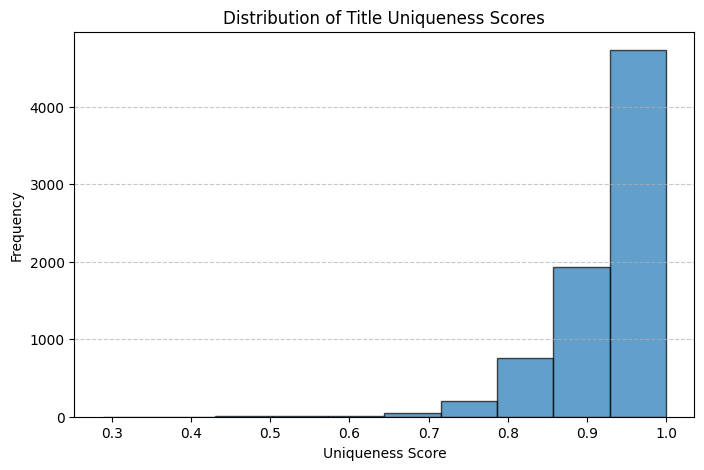

0.92456275514288

In [45]:
### Doing some EDA of the title uniqueness values since they seem HUGELY skewed right (expected, but maybe we can normalize them?)

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(combined_df['title_uniqueness'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Uniqueness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Title Uniqueness Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import statistics
statistics.mean(combined_df['title_uniqueness'])

In [38]:
### Attempting to get a better distribution of uniqueness score values (so that they are more interpretable) by performing a log normalization on the 'title_uniqueness' column.

import numpy as np

# Start with a log transformation and min-max scaling
combined_df['temp_transformed_title_uniqueness'] = np.log(combined_df['title_uniqueness'] - combined_df['title_uniqueness'].min() + 1)
# Normalize back to [0,1] scale
combined_df['normalized_title_uniqueness'] = (combined_df['temp_transformed_title_uniqueness'] - combined_df['temp_transformed_title_uniqueness'].min()) / (
    combined_df['temp_transformed_title_uniqueness'].max() - combined_df['temp_transformed_title_uniqueness'].min()
)

In [41]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['temp_transformed_title_uniqueness'])

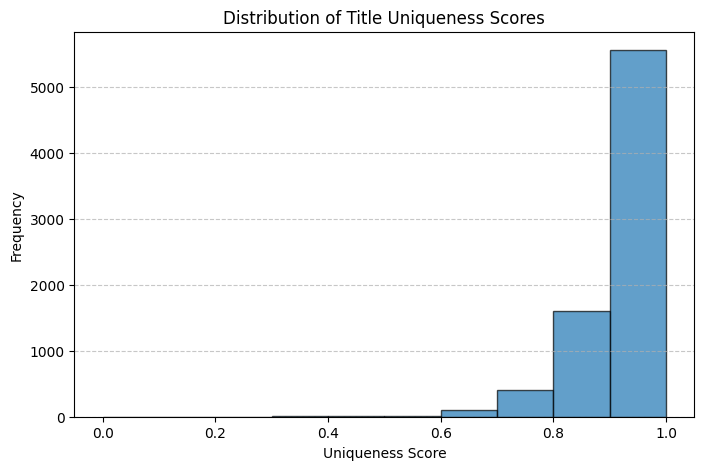

0.9147804022790873

In [47]:
### Going back to EDA to check the interpretability of the new, normalized title uniqueness scores

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(combined_df['normalized_title_uniqueness'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Uniqueness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Title Uniqueness Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import statistics
statistics.mean(combined_df['normalized_title_uniqueness'])

In [48]:
### Since the log transformation and renormalization barely helped the interpretability of the scores at all (it is so heavily skewed),
### I will try a Box-Cox Transformation with a min-max scaling to re-adjust the range to [0,1]

from scipy import stats
import numpy as np

# Apply Box-Cox transformation
combined_df['boxcox_uniqueness'], lambda_val = stats.boxcox(combined_df['title_uniqueness'] - combined_df['title_uniqueness'].min() + 1)
# Min-max scaling
combined_df['boxcox_normalized_title_uniqueness'] = (combined_df['boxcox_uniqueness'] - combined_df['boxcox_uniqueness'].min()) / (
    combined_df['boxcox_uniqueness'].max() - combined_df['boxcox_uniqueness'].min()
)

In [51]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['boxcox_uniqueness', 'boxcox_normalized'])

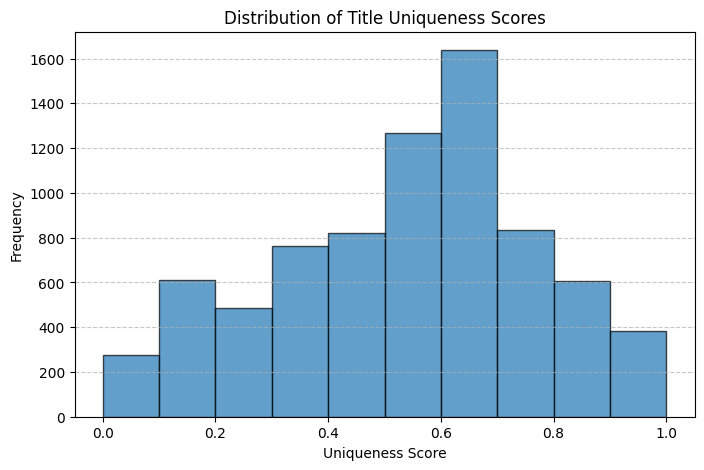

0.529361220428563

In [49]:
### Going back to EDA to check the interpretability of the new, Box-Cox transformed title uniqueness scores

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(combined_df['boxcox_normalized_title_uniqueness'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Uniqueness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Title Uniqueness Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import statistics
statistics.mean(combined_df['boxcox_normalized_title_uniqueness'])

In [60]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['yeojohnson_normalized', 'yeojohnson_uniqueness'])

In [39]:
combined_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,...,normalized_tmdb_score,genres_count,production_countries_count,average_score,score_difference,genres_uniqueness,production_countries_uniqueness,title_uniqueness,temp_transformed_title_uniqueness,normalized_title_uniqueness
0,Saturday Night Live,SHOW,1975,TV-14,89,"['comedy', 'music']",['US'],47,8.0,47910,...,7.21,2.0,1.0,7.605,0.79,4.845180,0.158644,0.913462,0.485508,0.903451
1,M*A*S*H,SHOW,1972,TV-PG,26,"['comedy', 'drama', 'war']",['US'],11,8.4,55882,...,8.20,3.0,1.0,8.300,0.20,5.558340,0.158644,0.951923,0.508901,0.946981
2,I Love Lucy,SHOW,1951,TV-G,30,"['comedy', 'family']",['US'],9,8.5,25944,...,8.29,2.0,1.0,8.395,0.21,4.820319,0.158644,0.961538,0.514664,0.957706
3,Taxi,SHOW,1978,TV-PG,25,"['comedy', 'drama']",['US'],5,7.7,13379,...,7.57,2.0,1.0,7.635,0.13,4.410636,0.158644,0.980769,0.526093,0.978973
4,The Mary Tyler Moore Show,SHOW,1970,TV-PG,28,['comedy'],['US'],7,8.2,8692,...,7.75,1.0,1.0,7.975,0.45,3.418101,0.158644,0.884615,0.467597,0.870121


In [61]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   title                               7688 non-null   object  
 1   type                                7688 non-null   category
 2   release_year                        7688 non-null   category
 3   age_certification                   4685 non-null   category
 4   runtime                             7688 non-null   int64   
 5   genres                              7688 non-null   object  
 6   production_countries                7688 non-null   object  
 7   seasons                             3166 non-null   Int64   
 8   imdb_score                          7234 non-null   float64 
 9   imdb_votes                          7219 non-null   Int64   
 10  tmdb_popularity                     7688 non-null   float64 
 11  normalized_tmdb_score         

In [ ]:
# Export final modifed dataset to csv
final_df = combined_df.copy()
final_df.to_csv('modified_v2.csv')